In [3]:
%load_ext autoreload
%autoreload 2

import copy
import matplotlib.pyplot as plt
import random
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
def plot_distribution(values, title):

    mean = np.mean(values)
    median = np.median(values)
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)

    print(
        "mean: ", mean, "\n", 
        "1st quantile: ", q1, "\n", 
        "median: ", median, "\n", 
        "3rd quantile: ", q3, 
    )

    plt.hist(values, color="mediumseagreen")
    plt.vlines(q1, 0, 100, color='mediumpurple', label=f"first quartile={q1:.2f}")
    plt.vlines(median, 0, 100, color='mediumpurple', label = f"median={median:.2f}")
    plt.vlines(q3, 0, 100, color='mediumpurple', label=f"third quartile={q3:.2f}")
    plt.legend()
    plt.title(title)


In [4]:
N = 1000
INIT_EXPOSED = int(N*0.5)

random.seed(0)
np.random.seed(0)

from seirsplus.networks import generate_demographic_contact_network, household_country_data

demographic_graphs, individual_ageGroups, households = generate_demographic_contact_network(
                                                            N=N, demographic_data=household_country_data('US'), 
                                                            distancing_scales=[0.7], isolation_groups=[])

G_baseline   = demographic_graphs['baseline']
G_quarantine = demographic_graphs['distancingScale0.7']

households_indices = [household['indices'] for household in households]

Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...


/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


## Try: sigma=0.2, lamda=0.2

In [95]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

# don't know why but have to create it every time
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.2,
    lamda = 0.2,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
    # save_results = True,
    # output_path = '../results/US_N=10000_p=0.01_T=100/naive/'
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Example viral load progressions')

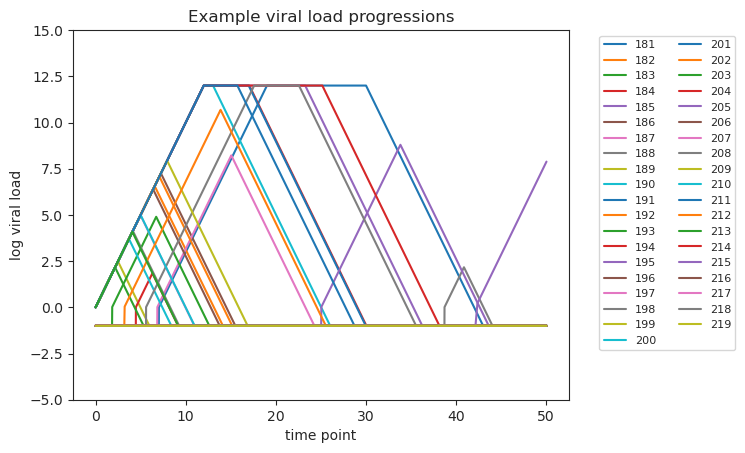

In [100]:
import matplotlib.pyplot as plt

for i in range(181, 220):

    plt.plot(
        sim_naive.model.VL_over_time["time_points"],
        sim_naive.model.VL_over_time["VL_time_series"][i],
        label = str(i)
    )

plt.xlabel("time point")
plt.ylabel("log viral load")
plt.ylim([-5, 15])
plt.legend(ncols=2, fontsize=8, bbox_to_anchor = (1.05, 1))
plt.title("Example viral load progressions")

mean:  7.879902792437836 
 1st quantile:  4.568042480876665 
 median:  8.286843397624267 
 3rd quantile:  12.0


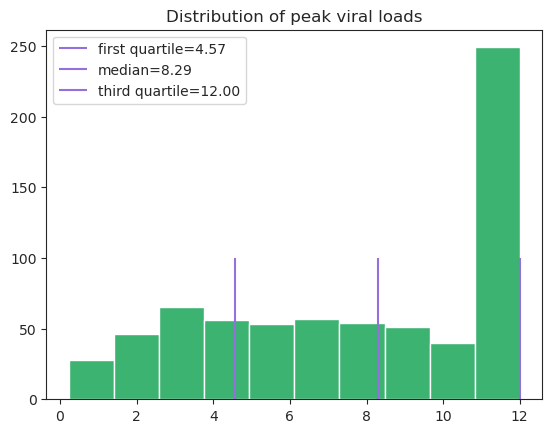

In [101]:
plot_distribution(
    sim_naive.model.peak_VLs, 
    "Distribution of peak viral loads"
)

mean:  5.013980341413278 
 1st quantile:  1.357211796142153 
 median:  3.3411762012139876 
 3rd quantile:  6.970298972759722


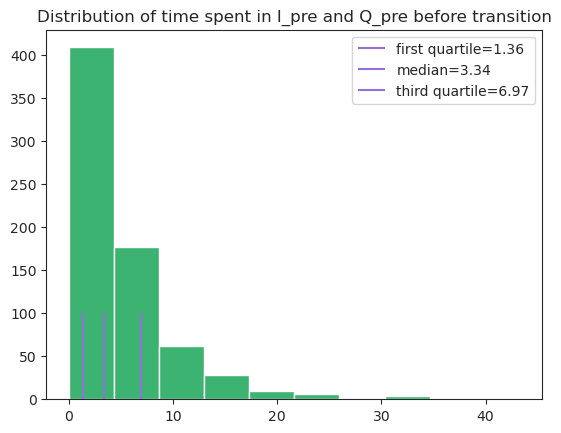

In [102]:
plot_distribution(
    sim_naive.model.time_in_pre_state,
    "Distribution of time spent in I_pre and Q_pre before transition"
)

## Try: sigma=0.5, lamda=0.5

In [105]:
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.5,
    lamda = 0.5,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mean:  3.93823703378608 
 1st quantile:  1.8412516394507425 
 median:  3.3501538183892827 
 3rd quantile:  5.317004823807724


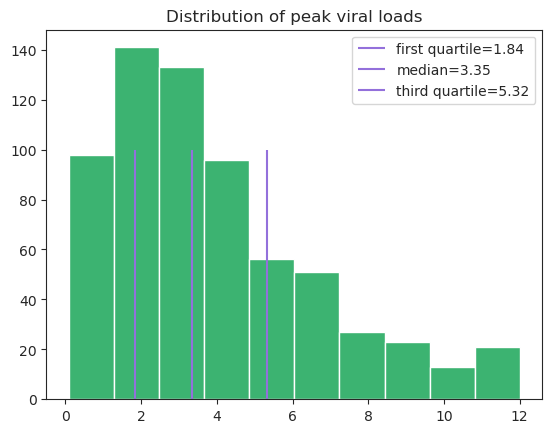

In [106]:
plot_distribution(
    sim_naive.model.peak_VLs, 
    "Distribution of peak viral loads"
)

mean:  1.9944549129524671 
 1st quantile:  0.5270308656215847 
 median:  1.4195539919584184 
 3rd quantile:  2.5890806596751235


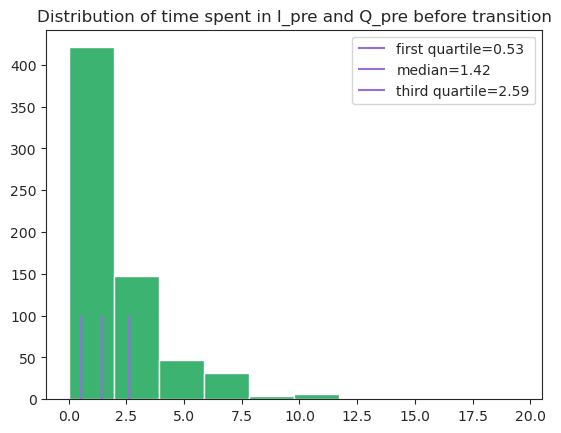

In [107]:
plot_distribution(
    sim_naive.model.time_in_pre_state,
    "Distribution of time spent in I_pre and Q_pre before transition"
)

## Try: sigma=0.3, lamda=0.3

In [108]:
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.3,
    lamda = 0.3,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mean:  6.220826899824005 
 1st quantile:  3.2677520892520384 
 median:  5.640016718207828 
 3rd quantile:  8.951361173108479


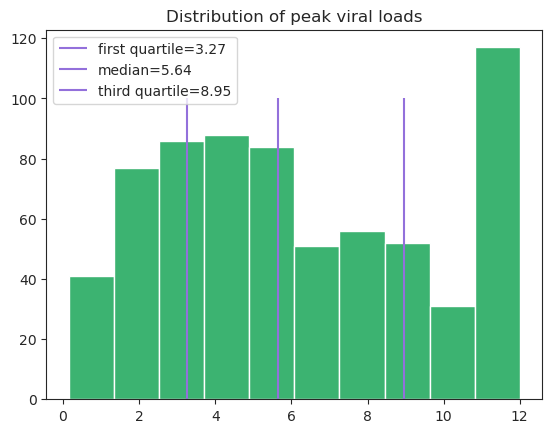

In [109]:
plot_distribution(
    sim_naive.model.peak_VLs, 
    "Distribution of peak viral loads"
)

mean:  3.373900051242083 
 1st quantile:  0.9396864326488246 
 median:  2.249165419439588 
 3rd quantile:  4.685778724344148


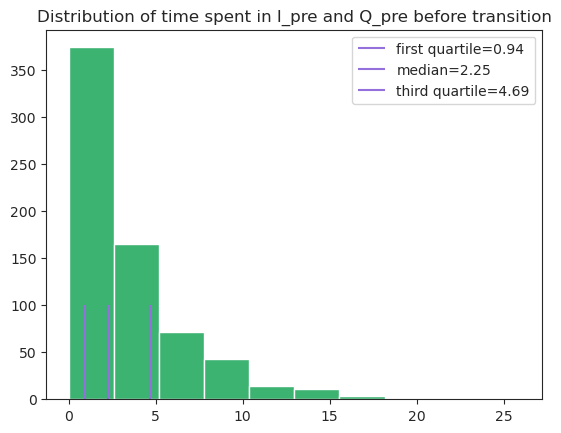

In [110]:
plot_distribution(
    sim_naive.model.time_in_pre_state,
    "Distribution of time spent in I_pre and Q_pre before transition"
)

## Try: sigma=0.25, lamda=0.25

In [115]:
test_model = ViralExtSEIRNetworkModel(
    G = G_baseline,
    beta = 0.1,
    sigma = 0.25,
    lamda = 0.25,
    gamma  = 0.25,
    initE = INIT_EXPOSED)

sim_naive = SimulationRunner(
    model=copy.copy(test_model),
    pooling_strategy='naive',
    T = 50,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results = False
)

sim_naive.run_simulation()

/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)
Generating walks (CPU: 4): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]
/home/yz685/anaconda3/envs/corr_pooling/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


mean:  7.07462959749762 
 1st quantile:  3.695865955459798 
 median:  6.8406040474998635 
 3rd quantile:  11.298807325339476


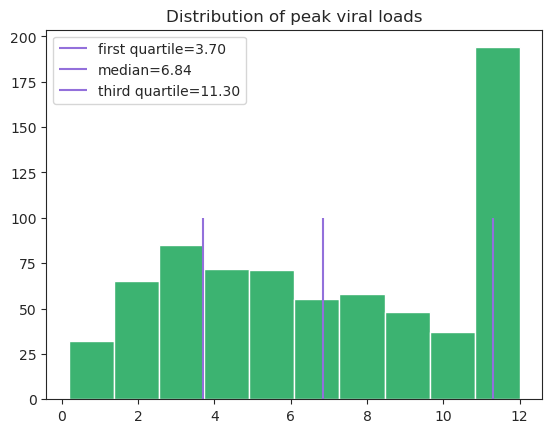

In [116]:
plot_distribution(
    sim_naive.model.peak_VLs, 
    "Distribution of peak viral loads"
)

mean:  4.1926720667559705 
 1st quantile:  1.2104656514981431 
 median:  2.8791770655718043 
 3rd quantile:  5.757107442224867


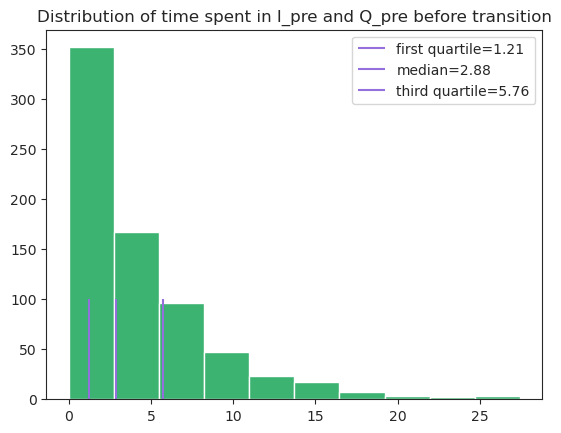

In [117]:
plot_distribution(
    sim_naive.model.time_in_pre_state,
    "Distribution of time spent in I_pre and Q_pre before transition"
)